# Setup

In [1]:
%load_ext autoreload

In [3]:
%autoreload

import my_functions as mf
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use("seaborn-v0_8-darkgrid")
import seaborn as sns
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200 , 'figure.figsize': (10, 5)})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set_style('darkgrid')

from pycaret.regression import *

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML

In [4]:
ignore_features = [
    "ceiling_height_agl:m",
    "cloud_base_agl:m",
    "snow_density:kgm3",
]

In [34]:
j_Y_train_a = pd.read_parquet("Jørgen_cleaned_data/y_train_a.parquet")
j_Y_train_b = pd.read_parquet("Jørgen_cleaned_data/y_train_b.parquet")
j_Y_train_c = pd.read_parquet("Jørgen_cleaned_data/y_train_c.parquet")
j_Y_train = pd.concat([j_Y_train_a, j_Y_train_b, j_Y_train_c], ignore_index=True)

j_X_train_a = pd.read_parquet("Jørgen_cleaned_data/x_train_a.parquet")
# j_X_train_a.drop(columns=ignore_features, inplace=True)
j_X_train_b = pd.read_parquet("Jørgen_cleaned_data/x_train_b.parquet")
# j_X_train_b.drop(columns=ignore_features, inplace=True)
j_X_train_c = pd.read_parquet("Jørgen_cleaned_data/x_train_c.parquet")
# j_X_train_c.drop(columns=ignore_features, inplace=True)
j_X_train = pd.concat([j_X_train_a, j_X_train_b, j_X_train_c], ignore_index=True)

j_train_a = pd.concat([j_Y_train_a, j_X_train_a], axis = 1)
j_train_b = pd.concat([j_Y_train_b, j_X_train_b], axis = 1)
j_train_c = pd.concat([j_Y_train_c, j_X_train_c], axis = 1)

j_X_test_a = pd.read_parquet("Jørgen_cleaned_data/x_test_a.parquet")
# j_X_test_a.drop(columns=ignore_features, inplace=True)
j_X_test_b = pd.read_parquet("Jørgen_cleaned_data/x_test_b.parquet")
# j_X_test_b.drop(columns=ignore_features, inplace=True)
j_X_test_c = pd.read_parquet("Jørgen_cleaned_data/x_test_c.parquet")
# j_X_test_c.drop(columns=ignore_features, inplace=True)
j_X_test = pd.concat([j_X_test_a, j_X_test_b, j_X_test_c], ignore_index=True)

j_X_test_a["time"] = pd.to_datetime("01-01-2019")
j_X_test_b["time"] = pd.to_datetime("01-01-2019")
j_X_test_c["time"] = pd.to_datetime("01-01-2019")

# Main stuff:

In [6]:
j_reg_full_a = RegressionExperiment()
j_reg_full_a.setup(
    data = j_train_a,
    use_gpu = True,
    target = "pv_measurement",
    train_size = .99999,
    max_encoding_ohe = -1,
    create_date_columns = [],
    low_variance_threshold = 0,
    # ignore_features=ignore_features,
    # group_features = similar_features,
    # remove_multicollinearity = True,
    # drop_groups=True,
    fold = 25,
    polynomial_features=True,
    # polynomial_degree = 3,
    # feature_selection=True,
    # n_features_to_select = 32,
    # pca = True,
    # html = False,
    session_id = 97,
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

,Description,Value
0,Session id,97
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(18036, 164)"
4,Transformed data shape,"(18036, 13105)"
5,Transformed train set shape,"(18035, 13105)"
6,Transformed test set shape,"(1, 13105)"
7,Numeric features,162
8,Date features,1
9,Rows with missing values,98.5%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

In [133]:
j_reg_full_a.compare_models(fold = 2, sort = "MAE")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:01:37
Status,. . . . . . . . . . . . . . . . . .,Fitting 2 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [11]:
j_lgbm_full_a = j_reg_full_a.create_model(
    estimator = "lightgbm",
    # fold = 30,
    # verbose = False,
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,282.8241,210119.6247,458.3881,0.8868,0.8553,3.4503
1,307.1379,256800.5995,506.7550,0.8764,0.8109,2.1485
2,328.2513,282292.2614,531.3118,0.8459,0.8046,2.3041
3,327.4907,284931.0968,533.7894,0.8683,0.7946,1.9060
4,298.7222,236336.3384,486.1444,0.8750,0.8170,1.8964
5,309.1477,239701.9810,489.5937,0.8860,0.8739,2.6923
6,292.9462,234518.8132,484.2714,0.8696,0.8794,3.1668
7,302.7142,244839.4617,494.8126,0.8736,0.7559,1.6037
8,300.9716,228369.8639,477.8806,0.8788,0.8180,2.3766


In [16]:
j_cat_full_a = j_reg_full_a.create_model(
    estimator = "catboost",
    # fold = 30,
    # verbose = False,
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,281.1900,204715.6133,452.4551,0.8897,0.8726,3.5374
1,301.8302,245821.0128,495.8034,0.8817,0.8203,2.6311
2,310.1439,261203.8737,511.0811,0.8574,0.8104,2.7067
3,317.4080,269521.0513,519.1542,0.8755,0.8687,2.7113
4,291.5253,225094.7186,474.4415,0.8810,0.8382,1.9254
5,305.0899,238497.2810,488.3618,0.8866,0.8848,3.1229
6,292.6596,225860.8700,475.2482,0.8744,0.9822,4.8380
7,299.2288,233206.7166,482.9148,0.8796,0.7976,2.1100
8,301.9814,224689.2761,474.0140,0.8807,0.8618,2.7407


In [ ]:
j_lgbm_full_a = j_reg_full_a.create_model(
    estimator = "lightgbm",
    # fold = 30,
    verbose = False,
)
j_lgbm_full_a_tuned = j_reg_full_a.tune_model(
    estimator = j_lgbm_full_a,
    # n_iter=20,
    verbose = False,
)
j_lgbm_full_a_score = j_reg_full_a.pull().loc[["Mean", "Std"],["MAE"]].transpose()
j_lgbm_full_a_score.columns.name = None
j_lgbm_full_a_score.index = ["Lightgbm"]
j_lgbm_full_a_score.index.name = "MAE"
# display(j_lgbm_full_a_score)

j_cat_full_a = j_reg_full_a.create_model(
    estimator = "catboost",
    # fold = 30,
    verbose = False,
)
j_cat_full_a_tuned = j_reg_full_a.tune_model(
    estimator = j_cat_full_a,
    # n_iter=20,
    verbose = False,
)
j_cat_full_a_score = j_reg_full_a.pull().loc[["Mean", "Std"],["MAE"]].transpose()
j_cat_full_a_score.columns.name = None
j_cat_full_a_score.index = ["CatBoost"]
j_cat_full_a_score.index.name = "MAE"
# display(j_cat_full_a_score)

j_blended_full_a = j_reg_full_a.blend_models(
    estimator_list = [
        j_lgbm_full_a,
        j_cat_full_a,
    ],
    # fold = 30,
    verbose = False,
)
j_blended_full_a_tuned = j_reg_full_a.tune_model(
    estimator = j_blended_full_a,
    # n_iter=20,
    verbose = False,
)
j_blended_full_a_score = j_reg_full_a.pull().loc[["Mean", "Std"],["MAE"]].transpose()
j_blended_full_a_score.columns.name = None
j_blended_full_a_score.index = ["Blended"]
j_blended_full_a_score.index.name = "MAE"
# display(j_blended_full_a_score)

j_full_a_score = pd.concat([j_lgbm_full_a_score, j_cat_full_a_score, j_blended_full_a_score])
display(j_full_a_score.style.highlight_min("Mean", axis = 0))

In [7]:
j_reg_full_b = RegressionExperiment()
j_reg_full_b.setup(
    data = j_train_b,
    use_gpu = True,
    target = "pv_measurement",
    train_size = .99999,
    max_encoding_ohe = -1,
    create_date_columns = [],
    low_variance_threshold = 0,
    # ignore_features=ignore_features,
    # group_features = similar_features,
    # remove_multicollinearity = True,
    # drop_groups=True,
    fold = 25,
    polynomial_features=True,
    # polynomial_degree = 3,
    # feature_selection=True,
    # n_features_to_select = 32,
    # pca = True,
    # html = False,
    session_id = 97,
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

,Description,Value
0,Session id,97
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(12274, 164)"
4,Transformed data shape,"(12274, 13052)"
5,Transformed train set shape,"(12273, 13052)"
6,Transformed test set shape,"(1, 13052)"
7,Numeric features,162
8,Date features,1
9,Rows with missing values,98.2%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

In [12]:
j_lgbm_full_b = j_reg_full_b.create_model(
    estimator = "lightgbm",
    # fold = 30,
    # verbose = False,
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,45.9948,5244.4849,72.4188,0.9165,0.6965,1.6623
1,51.9535,7582.2122,87.0759,0.8939,0.6992,1.6975
2,54.2872,7880.1783,88.7704,0.8799,0.7115,1.5655
3,48.5655,6697.6842,81.8394,0.9079,0.6491,1.1700
4,49.9675,7148.6488,84.5497,0.8868,0.7306,1.3743
5,45.9500,5909.4938,76.8732,0.9144,0.6567,1.2243
6,52.0505,7320.7130,85.5612,0.8991,0.6863,1.4817
7,48.6355,6205.1699,78.7729,0.9102,0.7278,1.7171
8,53.3179,7136.4712,84.4776,0.8984,0.7476,1.6470


In [17]:
j_cat_full_b = j_reg_full_b.create_model(
    estimator = "catboost",
    # fold = 30,
    # verbose = False,
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,44.9908,5261.0917,72.5334,0.9162,0.7063,1.1352
1,51.0461,7425.4664,86.1711,0.8961,0.6906,1.4272
2,53.6871,7596.2791,87.1566,0.8842,0.7038,1.4722
3,48.1736,6716.0831,81.9517,0.9077,0.6327,1.0362
4,48.9463,6939.3293,83.3026,0.8901,0.7266,1.4158
5,46.9118,6043.6641,77.7410,0.9125,0.6374,1.0330
6,50.7883,6494.7948,80.5903,0.9105,0.6930,1.5621
7,47.8667,5852.4942,76.5016,0.9153,0.7141,1.5757
8,53.0010,7113.5544,84.3419,0.8988,0.7204,1.4397


In [8]:
j_reg_full_c = RegressionExperiment()
j_reg_full_c.setup(
    data = j_train_c,
    use_gpu = True,
    target = "pv_measurement",
    train_size = .99999,
    max_encoding_ohe = -1,
    create_date_columns = [],
    low_variance_threshold = 0,
    # ignore_features=ignore_features,
    # group_features = similar_features,
    # remove_multicollinearity = True,
    # drop_groups=True,
    fold = 25,
    polynomial_features=True,
    # polynomial_degree = 3,
    # feature_selection=True,
    # n_features_to_select = 32,
    # pca = True,
    # html = False,
    session_id = 97,
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

,Description,Value
0,Session id,97
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(9676, 164)"
4,Transformed data shape,"(9676, 13093)"
5,Transformed train set shape,"(9675, 13093)"
6,Transformed test set shape,"(1, 13093)"
7,Numeric features,162
8,Date features,1
9,Rows with missing values,99.8%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

In [13]:
j_lgbm_full_c = j_reg_full_c.create_model(
    estimator = "lightgbm",
    # fold = 30,
    # verbose = False,
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,42.3209,4584.5881,67.7096,0.8980,0.5274,0.6740
1,44.4180,4860.7245,69.7189,0.9088,0.5175,0.5809
2,42.5412,4991.9151,70.6535,0.8913,0.4764,0.4695
3,47.1955,5953.8734,77.1613,0.8721,0.5183,0.5655
4,40.3082,4063.8370,63.7482,0.9132,0.4703,0.4946
5,47.0478,5538.9284,74.4240,0.8832,0.4861,0.5708
6,42.4420,4250.1743,65.1934,0.9037,0.4132,0.3964
7,38.3747,3645.1168,60.3748,0.9135,0.5482,0.7534
8,47.3343,5532.5133,74.3809,0.8968,0.4391,0.4333


In [92]:
j_cat_full_c = j_reg_full_c.create_model(
    estimator = "catboost",
    # fold = 30,
    # verbose = False,
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.8727,4620.4902,67.9742,0.8972,0.5454,0.7077
1,44.3935,4895.4423,69.9674,0.9081,0.4920,0.5224
2,42.7838,4891.7909,69.9413,0.8934,0.4969,0.4770
3,49.3586,6433.5022,80.2091,0.8618,0.5716,0.5905
4,41.0450,4343.5295,65.9055,0.9072,0.4715,0.4658
5,47.6112,5431.7677,73.7005,0.8855,0.4865,0.5426
6,44.4491,4683.3188,68.4348,0.8938,0.4344,0.4182
7,38.4674,3662.9649,60.5224,0.9131,0.5272,0.6353
8,48.0732,5842.4804,76.4361,0.8910,0.4601,0.4757


# Bagging LGBM

In [14]:
j_lgbm_full_a_bagged = j_reg_full_a.ensemble_model(
    estimator = j_lgbm_full_a,
    # fold = 30,
    # verbose = False,
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,286.0259,214477.9215,463.1176,0.8845,0.8490,3.2734
1,312.6669,267947.7751,517.6367,0.8711,0.7966,2.2209
2,324.6757,272595.3030,522.1066,0.8512,0.7779,2.0836
3,323.8935,285801.5608,534.6041,0.8679,0.7776,1.9246
4,298.4199,239044.9432,488.9222,0.8736,0.8197,2.0330
5,312.1138,255740.9145,505.7083,0.8784,0.8564,2.3519
6,293.6365,232524.7659,482.2082,0.8707,0.8838,3.5365
7,307.7667,251637.6589,501.6350,0.8701,0.7277,1.6758
8,307.9056,243256.1113,493.2100,0.8709,0.8132,2.3469


In [15]:
j_lgbm_full_b_bagged = j_reg_full_b.ensemble_model(
    estimator = j_lgbm_full_b,
    # fold = 30,
    # verbose = False,
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,45.4567,5411.7717,73.5647,0.9138,0.6855,1.6191
1,53.0727,8049.0406,89.7164,0.8873,0.6861,1.5374
2,54.5282,8174.0363,90.4104,0.8754,0.7115,1.5807
3,50.0126,7141.0377,84.5047,0.9018,0.6299,1.0713
4,50.2420,7275.6426,85.2974,0.8848,0.7242,1.3639
5,47.8013,6470.5398,80.4397,0.9063,0.6411,1.1443
6,53.4884,7635.4656,87.3812,0.8948,0.6862,1.5293
7,48.2059,6402.3801,80.0149,0.9074,0.7290,1.6994
8,55.2856,7560.1052,86.9489,0.8924,0.7272,1.5607


In [19]:
j_lgbm_full_c_bagged = j_reg_full_c.ensemble_model(
    estimator = j_lgbm_full_c,
    # fold = 30,
    # verbose = False,
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.3341,4864.5518,69.7463,0.8918,0.5460,0.8346
1,46.1327,5357.5946,73.1956,0.8995,0.5294,0.6316
2,42.5967,4906.2456,70.0446,0.8931,0.4618,0.4889
3,48.5970,6294.6922,79.3391,0.8648,0.5392,0.6071
4,40.6659,4151.1037,64.4291,0.9113,0.4576,0.4726
5,47.4714,5558.5373,74.5556,0.8828,0.4883,0.5951
6,41.7892,4255.8873,65.2372,0.9035,0.4125,0.3969
7,39.0680,3815.6757,61.7712,0.9095,0.5460,0.7678
8,47.5319,5866.4793,76.5929,0.8905,0.4404,0.4515


# Bagging CAT

In [ ]:
j_cat_full_a_bagged = j_reg_full_a.ensemble_model(
    estimator = j_cat_full_a,
    # fold = 30,
    # verbose = False,
)

In [ ]:
j_cat_full_b_bagged = j_reg_full_b.ensemble_model(
    estimator = j_cat_full_b,
    # fold = 30,
    # verbose = False,
)

In [ ]:
j_lgbm_full_c_bagged = j_reg_full_c.ensemble_model(
    estimator = j_lgbm_full_c,
    # fold = 30,
    # verbose = False,
)

# Save models

In [93]:
# j_reg_full_a.save_model(j_lgbm_full_a, "Poly_models/j_lgbm_full_a_poly")
# j_reg_full_a.save_model(j_lgbm_full_a_bagged, "Poly_models/j_lgbm_full_a_bagged_poly")
# j_reg_full_a.save_model(j_cat_full_a, "Poly_models/j_cat_full_a_poly")

# j_reg_full_b.save_model(j_lgbm_full_b, "Poly_models/j_lgbm_full_b_poly")
# j_reg_full_b.save_model(j_lgbm_full_b_bagged, "Poly_models/j_lgbm_full_b_bagged_poly")
# j_reg_full_b.save_model(j_cat_full_b, "Poly_models/j_cat_full_b_poly")

# j_reg_full_c.save_model(j_lgbm_full_c, "Poly_models/j_lgbm_full_c_poly")
# j_reg_full_c.save_model(j_lgbm_full_c_bagged, "Poly_models/j_lgbm_full_c_bagged_poly")
# j_reg_full_c.save_model(j_cat_full_c, "Poly_models/j_cat_full_c_poly")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['time'],
                                     transformer=ExtractDateTimeFeatures(features=[]))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['absolute_humidity_2m:gm3',
                                              'air_density_2m:kgm3',
                                              'ceiling_height_agl:m',
                                              'clear_sky_energy_1h:J',
                                              'clear_sky_rad:W',
                                              'cloud_base_agl:m',
                                              'dew_or_ri...
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('low_variance',


# Blending

In [99]:
j_lgbm_full_a_bagged_poly = j_reg_full_a.load_model("Poly_models/j_lgbm_full_a_bagged_poly")
j_lgbm_full_a_poly = j_reg_full_a.load_model("Poly_models/j_lgbm_full_a_poly")
j_cat_full_a_poly = j_reg_full_a.load_model("Poly_models/j_cat_full_a_poly")
j_lgbm_full_b_bagged_poly = j_reg_full_b.load_model("Poly_models/j_lgbm_full_b_bagged_poly")
j_lgbm_full_b_poly = j_reg_full_b.load_model("Poly_models/j_lgbm_full_b_poly")
j_cat_full_b_poly = j_reg_full_b.load_model("Poly_models/j_cat_full_b_poly")
j_lgbm_full_c_bagged_poly = j_reg_full_c.load_model("Poly_models/j_lgbm_full_c_bagged_poly")
j_lgbm_full_c_poly = j_reg_full_c.load_model("Poly_models/j_lgbm_full_c_poly")
j_cat_full_c_poly = j_reg_full_c.load_model("Poly_models/j_cat_full_c_poly")

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [100]:
pred_lgbm_full_a_bagged_poly = (j_reg_full_a.predict_model(j_lgbm_full_a_bagged_poly, j_X_test_a)["prediction_label"]) * np.ceil(j_X_test_a["is_day:idx"])
pred_lgbm_full_a_bagged_poly = pred_lgbm_full_a_bagged_poly.clip(0)

pred_lgbm_full_a_poly = (j_reg_full_a.predict_model(j_lgbm_full_a_poly, j_X_test_a)["prediction_label"]) * np.ceil(j_X_test_a["is_day:idx"])
pred_lgbm_full_a_poly = pred_lgbm_full_a_poly.clip(0)

pred_cat_full_a_poly = (j_reg_full_a.predict_model(j_cat_full_a_poly, j_X_test_a)["prediction_label"]) * np.ceil(j_X_test_a["is_day:idx"])
pred_cat_full_a_poly = pred_cat_full_a_poly.clip(0)

In [101]:
pred_lgbm_full_b_bagged_poly = (j_reg_full_b.predict_model(j_lgbm_full_b_bagged_poly, j_X_test_b)["prediction_label"]) * np.ceil(j_X_test_b["is_day:idx"])
pred_lgbm_full_b_bagged_poly = pred_lgbm_full_b_bagged_poly.clip(0)

pred_lgbm_full_b_poly = (j_reg_full_b.predict_model(j_lgbm_full_b_poly, j_X_test_b)["prediction_label"]) * np.ceil(j_X_test_b["is_day:idx"])
pred_lgbm_full_b_poly = pred_lgbm_full_b_poly.clip(0)

pred_cat_full_b_poly = (j_reg_full_b.predict_model(j_cat_full_b_poly, j_X_test_b)["prediction_label"]) * np.ceil(j_X_test_b["is_day:idx"])
pred_cat_full_b_poly = pred_cat_full_b_poly.clip(0)

In [102]:
pred_lgbm_full_c_bagged_poly = (j_reg_full_c.predict_model(j_lgbm_full_c_bagged_poly, j_X_test_c)["prediction_label"]) * np.ceil(j_X_test_c["is_day:idx"])
pred_lgbm_full_c_bagged_poly = pred_lgbm_full_c_bagged_poly.clip(0)

pred_lgbm_full_c_poly = (j_reg_full_c.predict_model(j_lgbm_full_c_poly, j_X_test_c)["prediction_label"]) * np.ceil(j_X_test_c["is_day:idx"])
pred_lgbm_full_c_poly = pred_lgbm_full_c_poly.clip(0)

pred_cat_full_c_poly = (j_reg_full_c.predict_model(j_cat_full_c_poly, j_X_test_c)["prediction_label"]) * np.ceil(j_X_test_c["is_day:idx"])
pred_cat_full_c_poly = pred_cat_full_c_poly.clip(0)

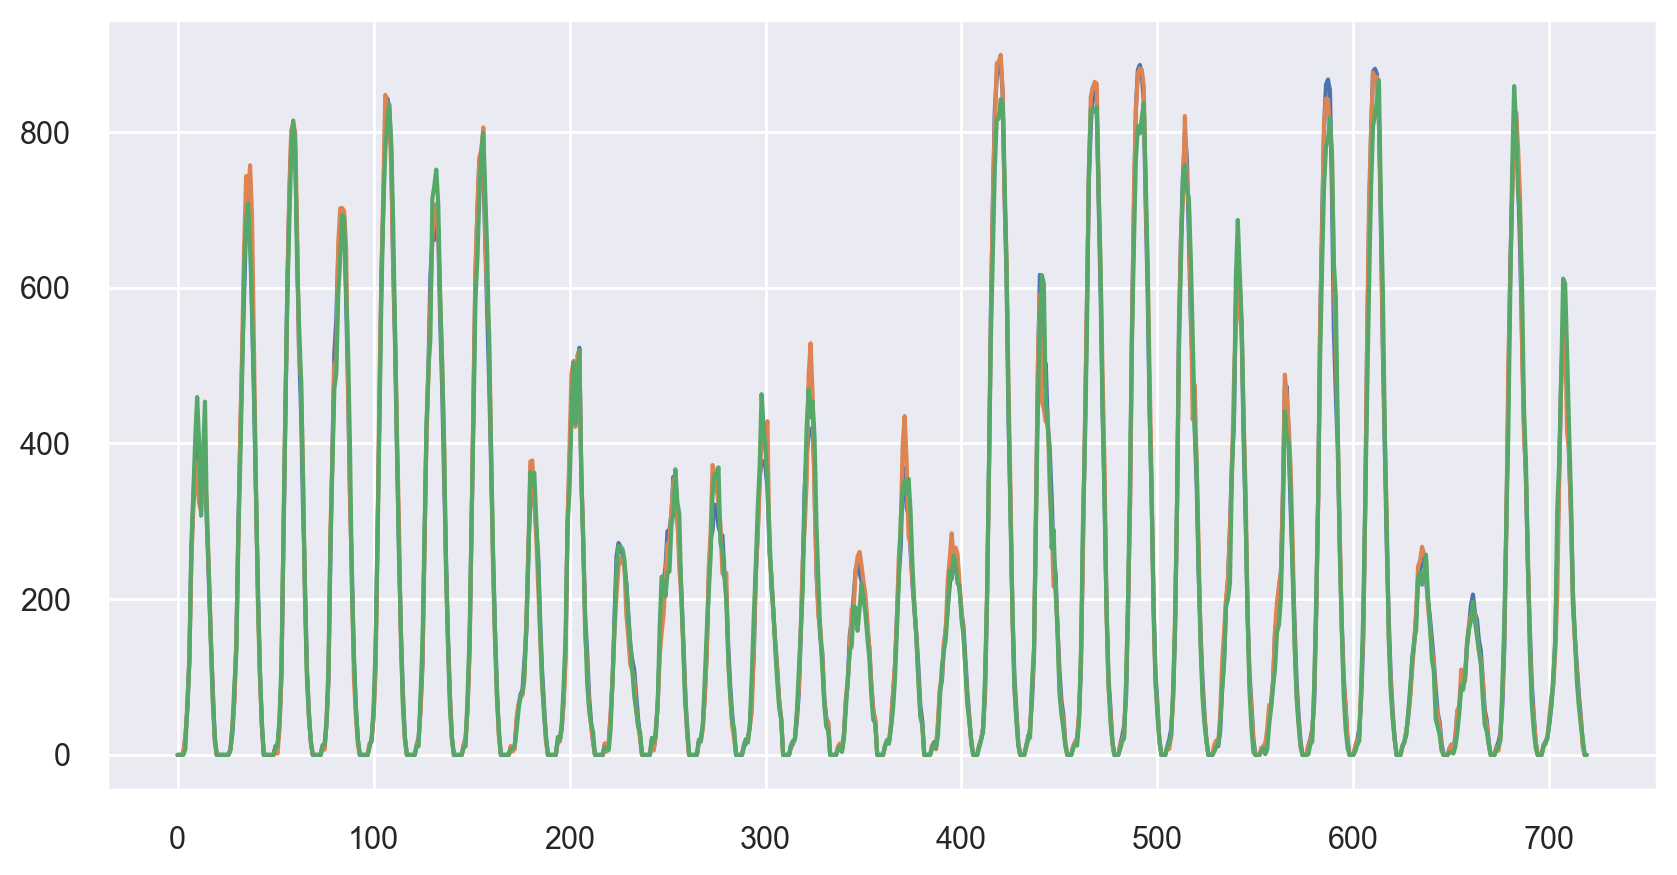

In [105]:
plt.plot(pred_lgbm_full_c_bagged_poly)
plt.plot(pred_lgbm_full_c_poly)
plt.plot(pred_cat_full_c_poly)

In [87]:
def save_predictions(all_predictions, title):
    final_predictions = np.concatenate(all_predictions)
    df = pd.DataFrame(final_predictions, columns=['prediction'])
    df['id'] = df.index
    df = df[['id', 'prediction']]
    df.to_csv(title, index=False)

In [122]:
pred_lgbm_full_poly = np.concatenate([
    pred_lgbm_full_a_poly,
    pred_lgbm_full_b_poly,
    pred_lgbm_full_c_poly,
])

pred_lgbm_full_bagged_poly = np.concatenate([
    pred_lgbm_full_a_bagged_poly,
    pred_lgbm_full_b_bagged_poly,
    pred_lgbm_full_c_bagged_poly,
])

pred_cat_full_poly = np.concatenate([
    pred_cat_full_a_poly,
    pred_cat_full_b_poly,
    pred_cat_full_c_poly,
])

In [132]:
save_predictions([pred_cat_full_a_poly,pred_cat_full_b_poly,pred_cat_full_c_poly,], "Poly_predictions/j_cat_full_poly.csv")

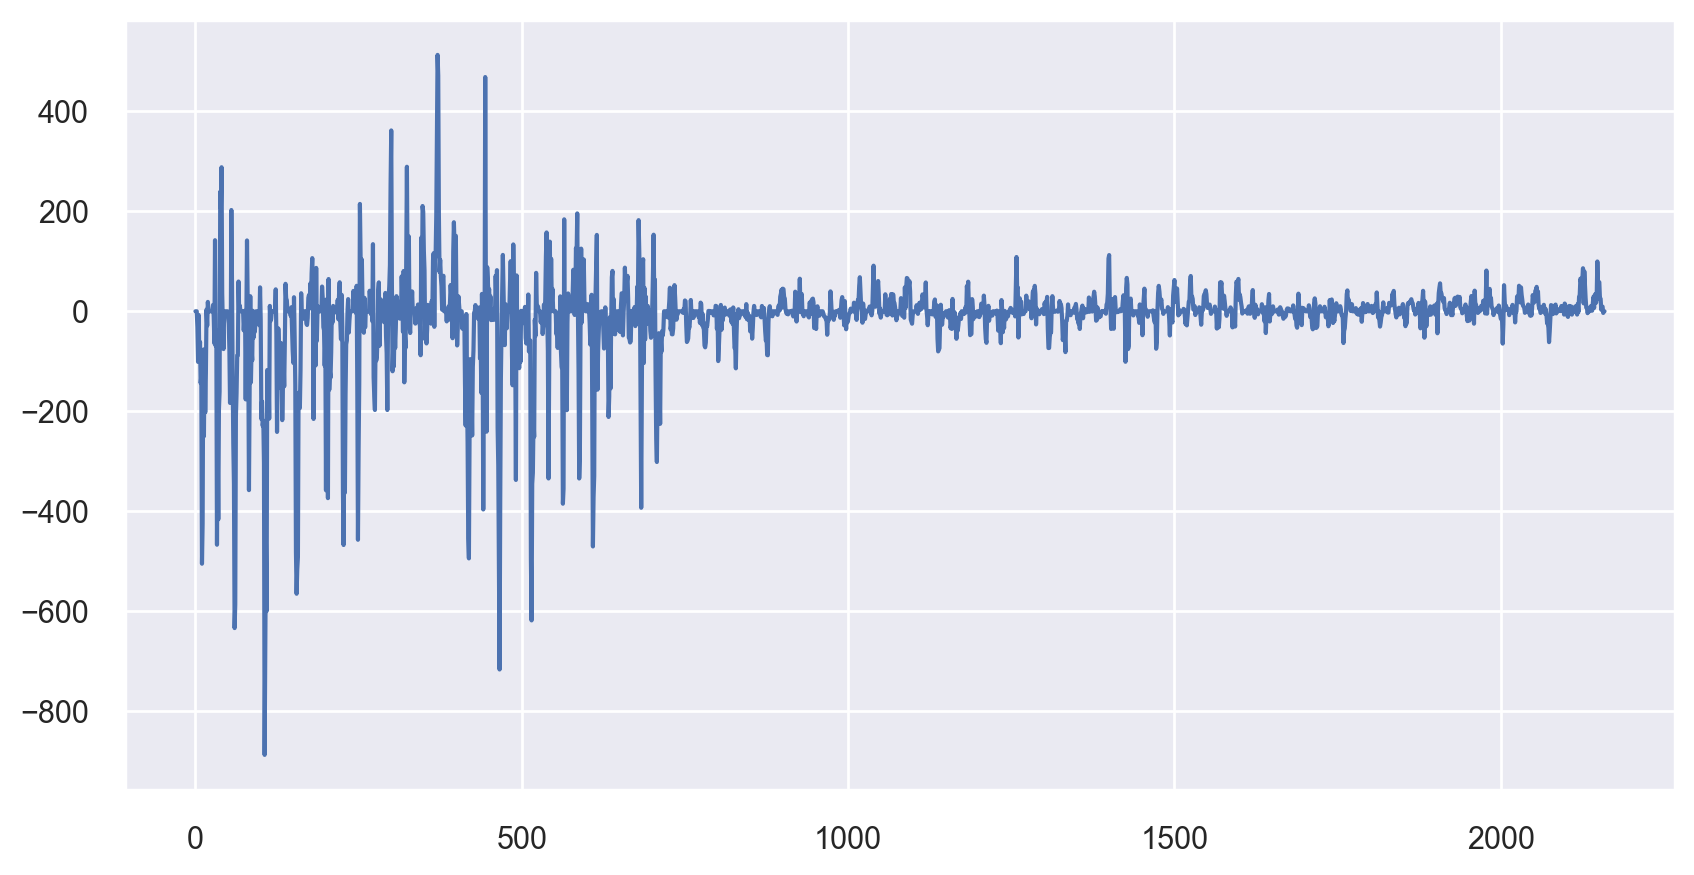

In [131]:
# plt.plot(pred_lgbm_full_bagged_poly-pd.read_csv("pycaret_catboost_gbm_average.csv").iloc[:,1])
# plt.plot(pred_lgbm_full_poly-pd.read_csv("pycaret_catboost_gbm_average.csv").iloc[:,1])
plt.plot((pred_cat_full_poly + pred_lgbm_full_bagged_poly)/2 -pd.read_csv("pycaret_catboost_gbm_average.csv").iloc[:,1])
# plt.plot(pred_lgbm_full_bagged_poly-pd.read_csv("lgbm_all_locations.csv").iloc[:,1])
plt.show()

In [115]:
pred_lgbm_full_poly[0]

0        0.000000
1        0.000000
2        0.000000
3       43.615253
4      359.150132
          ...    
715    216.417827
716     51.514501
717     19.887348
718      0.000000
719      0.000000
Length: 720, dtype: float64

In [114]:
pd.read_csv("lgbm_all_locations.csv").iloc[:720,1]

0        0.000000
1        0.000000
2        0.000000
3      153.905832
4      488.275727
          ...    
715    222.526022
716    102.469621
717     54.870964
718      0.000000
719      0.000000
Name: prediction, Length: 720, dtype: float64

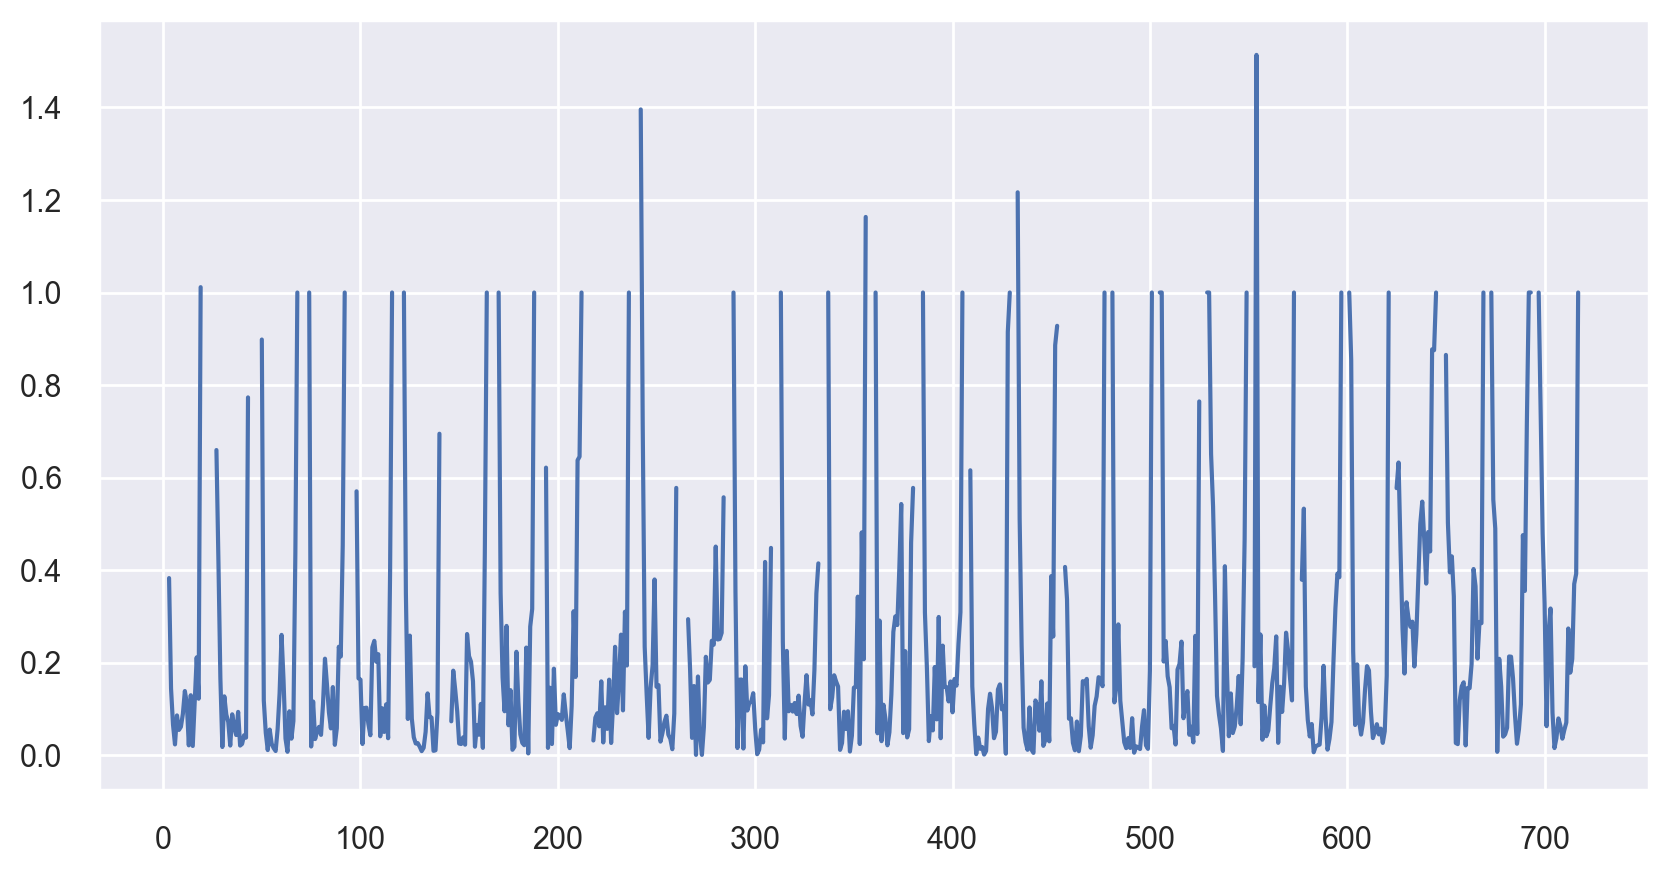

In [75]:
plt.plot(np.abs(pred_lgbm_full_a_poly - pred_cat_full_a_poly) / np.abs(pred_lgbm_full_a_poly))
# plt.plot(pred_lgbm_full_a_poly - pred_cat_full_a_poly)
# plt.plot(pred_cat_full_a_poly)

# plt.plot(pd.read_csv("pycaret_catboost_gbm_average.csv").iloc[:720,1])

# plt.plot(pred_lgbm_full_a_poly - pd.read_csv("pycaret_catboost_gbm_average.csv").iloc[:720,1])
plt.show()

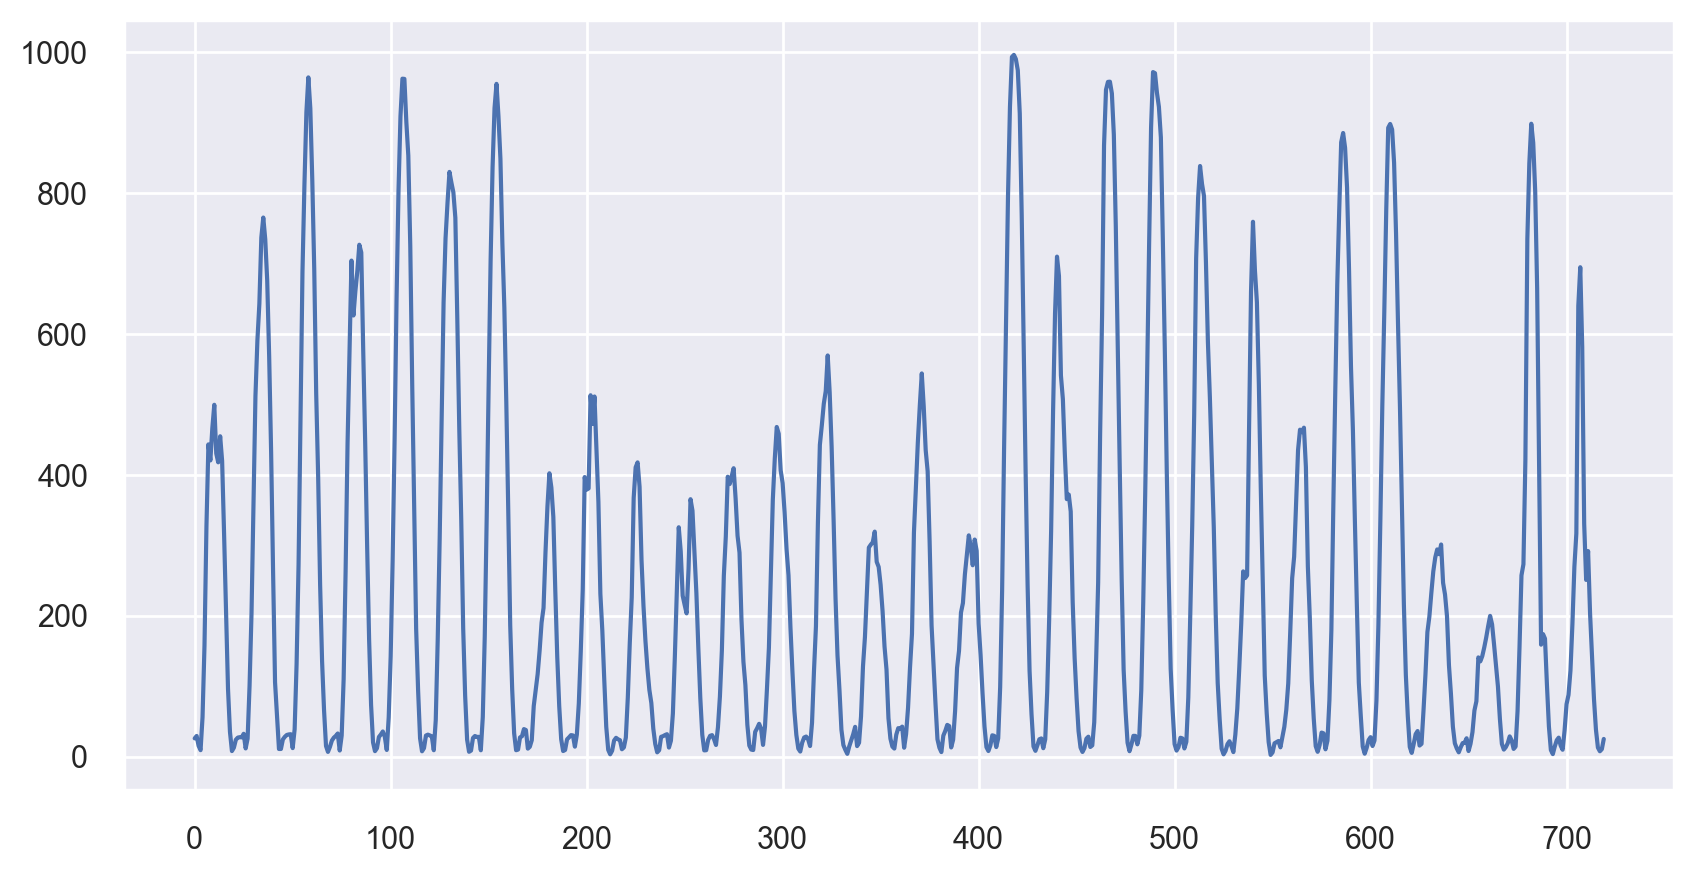

In [36]:
plt.plot((j_reg_full_b.predict_model(j_lgbm_full_b_bagged_poly, j_X_test_b)["prediction_label"]))

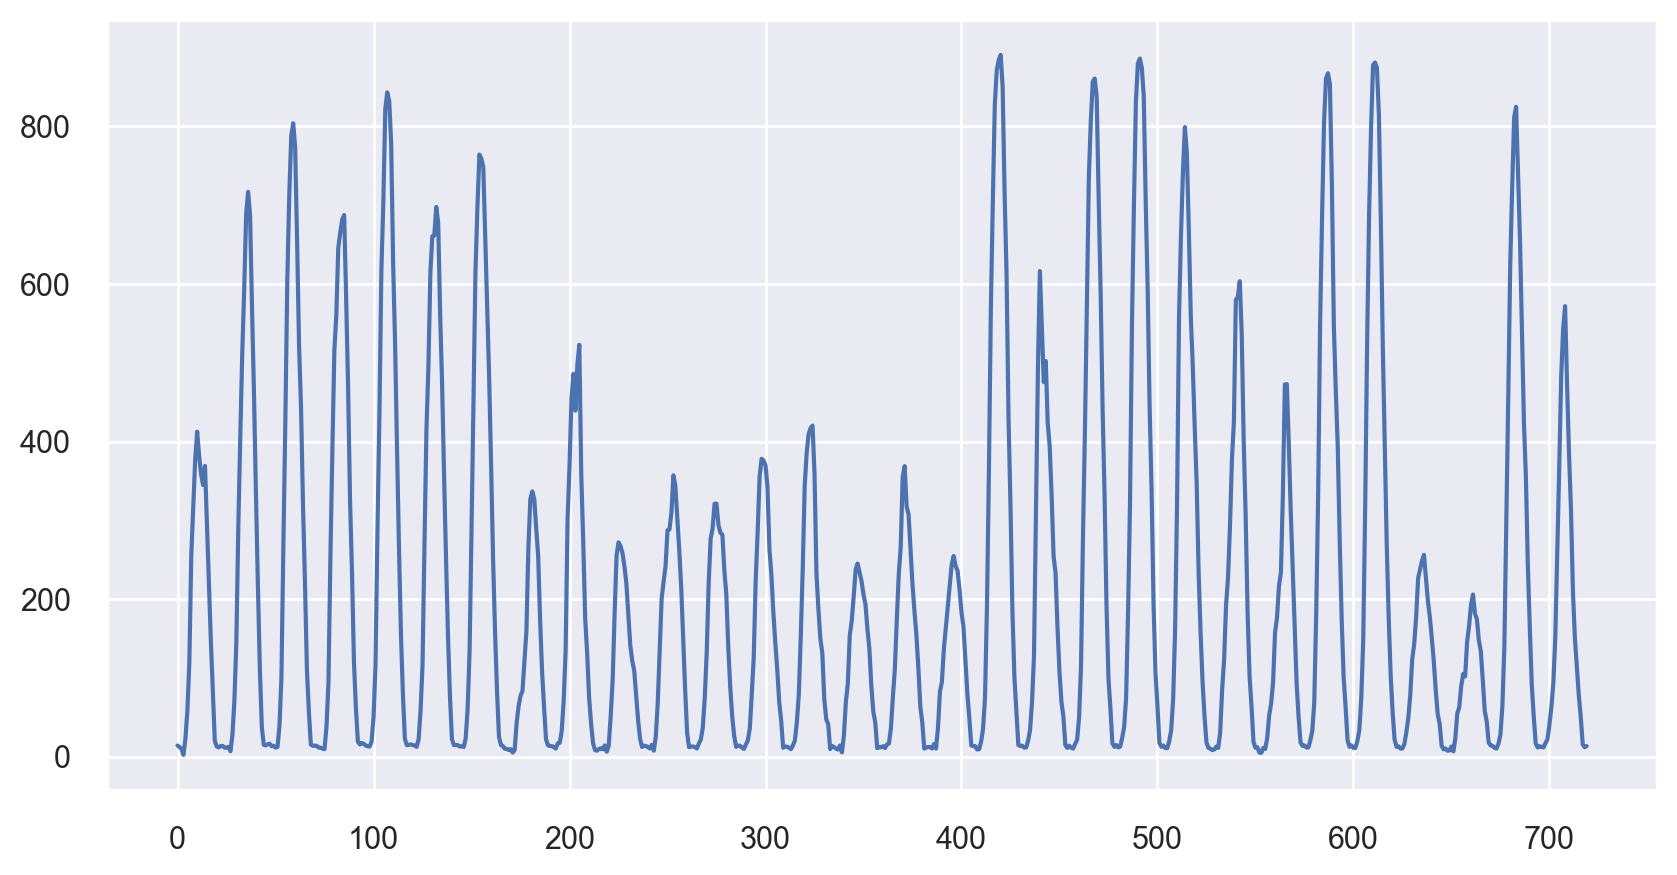

In [37]:
plt.plot((j_reg_full_c.predict_model(j_lgbm_full_c_bagged_poly, j_X_test_c)["prediction_label"]))

In [ ]:
blender_soft_a = j_reg_full_a.blend_models(
    estimator_list = [
        j_lgbm_full_a,
        j_cat_full_a,
        #  et_full_a,
        #  rf_full_a,
    ],
    # fold = 10,
)
pull_a = j_reg_full_a.pull()

In [ ]:
lgbm_full_feature_importance = pd.DataFrame(lgbm_full_a.feature_importances_, index=lgbm_full_a.feature_name_, columns = ["Importance"])
lgbm_full_feature_importance.sort_values(by="Importance", ascending=False, inplace=True)
lgbm_full_feature_importance_names = lgbm_full_feature_importance[lgbm_full_feature_importance["Importance"] > 0].index.tolist()
len(lgbm_full_feature_importance_names)

In [ ]:
train_a_poly = reg_full_a.dataset_transformed
train_a_poly.columns = train_a_poly.columns.str.replace(" ", "_")
train_a_poly_red = train_a_poly[lgbm_full_feature_importance_names + ["pv_measurement"]]

In [ ]:
pipeline_full_a = reg_full_a.get_config('pipeline')
X_test_a_poly = pipeline_full_a.transform(X_test_a)
X_test_a_poly.columns = X_test_a_poly.columns.str.replace(" ", "_")
X_test_a_poly_red = X_test_a_poly[lgbm_full_feature_importance_names]

In [ ]:
reg_lgbm_a_full_feature_importance_names_a = RegressionExperiment()
reg_lgbm_a_full_feature_importance_names_a.setup(
    data = train_a_poly_red,
    # use_gpu = True,
    target = "pv_measurement",
    train_size = .99999,
    max_encoding_ohe = -1,
    create_date_columns = [],
    # low_variance_threshold = 0,
    # group_features = similar_features,
    # remove_multicollinearity = True,
    # drop_groups=True,
    fold = 20,
    session_id = 0,
    # polynomial_features=True,
    # polynomial_degree = 3,
    # feature_selection=True,
    # pca = True,
    html = False,
)

In [ ]:
lgbm_full_a_feature_importance_names_a = reg_lgbm_a_full_feature_importance_names_a.create_model("lightgbm")

In [ ]:
# plt.plot(reg_full_a.predict_model(lgbm_full_a, X_test_a)["prediction_label"])
plt.plot(reg_lgbm_a_full_feature_importance_names_a.predict_model(lgbm_full_a_feature_importance_names_a, X_test_a_poly_red)["prediction_label"])
plt.plot(pd.read_csv("pycaret_catboost_gbm_average.csv").iloc[:720]["prediction"])
plt.show()

In [ ]:
plt.plot(pd.read_csv("pycaret_advanced_rolling357.csv").iloc[:720]["prediction"])
plt.plot(pd.read_csv("pycaret_catboost_gbm_average.csv").iloc[:720]["prediction"])
# plt.plot(reg_full_a.predict_model(lgbm_full_a, X_test_a)["prediction_label"])

# plt.plot(pd.read_csv("pycaret_catboost.csv")["prediction"], "-")
# plt.plot(pd.read_csv("pycaret_advanced_rf.csv")["prediction"], "-")
plt.show()

In [ ]:
reg_full_b = RegressionExperiment()
reg_full_b.setup(
    data = train_b,
    # use_gpu = True,
    target = "pv_measurement",
    train_size = .99999,
    max_encoding_ohe = -1,
    create_date_columns = [],
    low_variance_threshold = 0,
    # group_features = similar_features,
    # remove_multicollinearity = True,
    # drop_groups=True,
    fold = 20,
    session_id = 0,
    polynomial_features=True,
    # polynomial_degree = 3,
    # feature_selection=True,
    # n_features_to_select = 20,
    # pca = True,
    # html = False,
)

In [ ]:
lgbm_full_b = reg_full_b.create_model("lightgbm")

In [ ]:
lgbm_full_b_feature_importance = pd.DataFrame(lgbm_full_b.feature_importances_, index=lgbm_full_b.feature_name_, columns = ["Importance"])
lgbm_full_b_feature_importance.sort_values(by="Importance", ascending=False, inplace=True)
lgbm_full_b_feature_importance_names = lgbm_full_b_feature_importance[lgbm_full_b_feature_importance["Importance"] > 3].index.tolist()
# lgbm_full_feature_importance_names

In [ ]:
train_b_poly = reg_full_b.dataset_transformed
train_b_poly.columns = train_b_poly.columns.str.replace(" ", "_")
train_b_poly_red = train_b_poly[lgbm_full_b_feature_importance_names + ["pv_measurement"]]

In [ ]:
train_b_poly_red

In [ ]:
reg_lgbm_full_b_feature_importance_names_a = RegressionExperiment()
reg_lgbm_full_b_feature_importance_names_a.setup(
    data = train_b_poly_red,
    # use_gpu = True,
    target = "pv_measurement",
    train_size = .99999,
    max_encoding_ohe = -1,
    create_date_columns = [],
    # low_variance_threshold = 0,
    # group_features = similar_features,
    # remove_multicollinearity = True,
    # drop_groups=True,
    fold = 20,
    session_id = 0,
    # polynomial_features=True,
    # polynomial_degree = 3,
    # feature_selection=True,
    # pca = True,
    # html = False,
)

In [ ]:
lgbm_full_feature_importance_names_a = reg_lgbm_full_feature_importance_names_a.create_model("lightgbm")

# shit

In [ ]:
reg_full = RegressionExperiment()
reg_full.setup(
    data = train,
    use_gpu = True,
    target = "pv_measurement",
    train_size = .99999,
    max_encoding_ohe = -1,
    create_date_columns = [],
    fold = 20,
    session_id = 0,
)

In [ ]:
cat_full = reg_full.create_model("catboost")

In [ ]:
ensembled_cat_full = reg_full.ensemble_model(
    cat_full,
    method = "Bagging",
    n_estimators = 20,
    # choose_better = True,
    optimize = "MSE"
)

In [ ]:
reg_full.evaluate_model(cat_full)

In [ ]:
cat_full_feature_importance = pd.DataFrame(cat_full.feature_importances_, index=cat_full.feature_names_, columns = ["Importance"])
cat_full_feature_importance.sort_values(by="Importance", ascending=False, inplace=True)
cat_full_feature_importance_names = cat_full_feature_importance.index.tolist()
# cat_full_feature_importance_names

In [ ]:
cat_full_feature_importance_names_selected = cat_full_feature_importance_names[:12]
reg_important_features = RegressionExperiment()
reg_important_features.setup(
    data = train,
    use_gpu = True,
    target = "pv_measurement",
    train_size = .99999,
    max_encoding_ohe = -1,
    create_date_columns = [],
    fold = 20,
    feature_selection = True,
    n_features_to_select = 1,
    keep_features = cat_full_feature_importance_names_selected,
    session_id = 0
)

In [ ]:
cat_important_features = reg_important_features.create_model("catboost")

In [ ]:
ensembled_cat_important_features = reg_important_features.ensemble_model(
    cat_important_features,
    method = "Bagging",
    n_estimators = 20,
    # choose_better = True,
    optimize = "MSE"
)

In [ ]:
final_cat_full = reg_full.finalize_model(ensembled_cat_full)
final_cat_important_features = reg_important_features.finalize_model(ensembled_cat_important_features)

In [ ]:
cat_full_predictions = reg_full.predict_model(final_cat_full, X_test)["prediction_label"]
# cat_full_predictions[X_test[~((X_test["time"].dt.hour <= 21) & (X_test["time"].dt.hour >= 1))].index] = 0
cat_full_predictions[cat_full_predictions < 0] = 0
# plt.plot(cat_full_predictions)
# plt.show()

In [ ]:
cat_important_features_predictions = reg_important_features.predict_model(final_cat_important_features, X_test)["prediction_label"]
# cat_important_features_predictions[X_test[~((X_test["time"].dt.hour <= 21) & (X_test["time"].dt.hour >= 1))].index] = 0
cat_important_features_predictions[cat_important_features_predictions < 0] = 0
# plt.plot(cat_important_features_predictions)
# plt.show()

In [ ]:
mf.export_csv2(
    np.array(cat_important_features_predictions),
    # f"PyCaret_CatBoost_7_20_Fold_20_Bag.csv"
    f"PyCaret_CatBoost_8_20_Fold_20_Bag_top_{len(cat_full_feature_importance_names_selected)}_features.csv"
)

In [ ]:
plt.plot(cat_full_predictions)
plt.plot(cat_important_features_predictions)
plt.show()

In [ ]:
# tuned_cat_full = reg_full.tune_model(
#     cat_full,
#     n_iter = 20,
#     # choose_better = False,
#     optimize = "MAE"
# )
# ensembled_tuned_cat_full = reg_full.ensemble_model(
#     tuned_cat_full,
#     method = "Bagging",
#     n_estimators = 20,
#     # choose_better = True,
#     optimize = "MAE"
# )

In [ ]:
lgbm_full = reg_full.create_model("lightgbm")

In [ ]:
ensembled_lgbm_full = reg_full.ensemble_model(
    lgbm_full,
    method = "Bagging",
    n_estimators = 20,
    # choose_better = True,
    optimize = "MAE"
)

In [ ]:
# tuned_lgbm_full = reg_full.tune_model(lgbm_full, n_iter = 20, optimize = "MSE")
# ensembled_tuned_lgbm_full = reg_full.ensemble_model(tuned_lgbm_full, method = "Bagging", n_estimators = 20, choose_better = True, optimize = "MSE")

In [ ]:
# reg_full.evaluate_model(cat_full)

In [ ]:
cat_full_predictions = reg_full.predict_model(cat_full, X_test)["prediction_label"]
# cat_full_predictions[X_test[~((X_test["time"].dt.hour <= 21) & (X_test["time"].dt.hour >= 1))].index] = 0
cat_full_predictions[cat_full_predictions < 0] = 0
plt.plot(cat_full_predictions)
plt.show()

In [ ]:
cat_full_feature_importance_names

In [ ]:
results_cat_important_features = np.array([])
for i in range(21):
   cat_full_feature_importance_selected_i = cat_full_feature_importance_names[:i+1]
   reg_important_features_i = RegressionExperiment()
   reg_important_features_i.setup(
      data = train,
      use_gpu = True,
      target = "pv_measurement",
      train_size = .99999,
      create_date_columns = [],
      fold = 10,
      feature_selection = True,
      n_features_to_select = 1,
      keep_features = cat_full_feature_importance_selected_i,
      session_id = 0,
      verbose = False)
   print(f"{cat_full_feature_importance_selected_i}")
   cat_important_features_i = reg_important_features_i.create_model("catboost")
   results_cat_important_features_i = reg_important_features_i.pull()
   MAE_i = results_cat_important_features_i[results_cat_important_features_i.index == "Mean"]["MAE"]
   results_cat_important_features = np.append(results_cat_important_features, MAE_i)

In [ ]:
plt.plot(results_cat_important_features)
plt.show()

In [ ]:
reg_important_features = RegressionExperiment()
reg_important_features.setup(data = train,
                     use_gpu = True,
                     target = "pv_measurement",
                     train_size = .99999,
                     create_date_columns = [],
                    #  create_date_columns = ["day", "month"],
                    #  polynomial_features = True,
                     fold = 10,
                     feature_selection = True,
                     n_features_to_select = 1,
                     keep_features = cat_full_feature_importance_selected[:10],
                     session_id = 0)

In [ ]:
cat_important_features = reg_important_features.create_model("catboost")

In [ ]:
tuned_cat_important_features = reg_important_features.tune_model(cat_important_features, n_iter = 50, optimize = "MAE")
bagged_cat_important_features = reg_important_features.ensemble_model(tuned_cat_important_features, method = "Bagging")

In [ ]:
cat_important_features_predictions = reg_full.predict_model(cat_important_features, X_test)["prediction_label"]
cat_important_features_predictions[X_test[~((X_test["time"].dt.hour <= 21) & (X_test["time"].dt.hour >= 1))].index] = 0
cat_important_features_predictions[cat_important_features_predictions < 0] = 0
plt.plot(cat_important_features_predictions)
plt.show()

In [ ]:
reg_full.predict_model(bagged_cat_important_features, X_test)["prediction_label"]

# A:

In [ ]:
reg_full_a = RegressionExperiment()
reg_full_a.setup(data = train_a,
               use_gpu = True,
               target = "pv_measurement",
               train_size = .99999,
               create_date_columns = [],
               # polynomial_features = True,
               fold = 10,
               ignore_features = ["location"],
               session_id = 0)

In [ ]:
cat_full_a = reg_full_a.create_model("catboost")

In [ ]:
reg_full_a.evaluate_model(cat_full_a)

In [ ]:
cat_full_predictions_a = reg_full_a.predict_model(cat_full_a, X_test_a)["prediction_label"]
cat_full_predictions_a[X_test_a[~((X_test_a["time"].dt.hour <= 21) & (X_test_a["time"].dt.hour >= 1))].index] = 0
cat_full_predictions_a[cat_full_predictions_a < 0] = 0
plt.plot(cat_full_predictions_a)
plt.show()

In [ ]:
cat_full_feature_importance_a = pd.DataFrame(cat_full_a.feature_importances_, index=cat_full_a.feature_names_, columns = ["Importance"])
cat_full_feature_importance_a.sort_values(by="Importance", ascending=False, inplace=True)
cat_full_feature_importance_selected_a = cat_full_feature_importance_a.iloc[:15].index.tolist()
cat_full_feature_importance_selected_a

In [ ]:
reg_important_features_a = RegressionExperiment()
reg_important_features_a.setup(data = train_a,
                     use_gpu = True,
                     target = "pv_measurement",
                     train_size = .99999,
                     create_date_columns = [],
                    #  create_date_columns = ["day", "month"],
                    #  polynomial_features = True,
                     fold = 10,
                     feature_selection = True,
                     n_features_to_select = 1,
                     keep_features = cat_full_feature_importance_selected_a,
                     session_id = 0)

In [ ]:
cat_important_features_a = reg_important_features_a.create_model("catboost")

In [ ]:
cat_full_predictions_a = reg_full_a.predict_model(cat_full_a, X_test_a)["prediction_label"]
cat_full_predictions_a[X_test_a[~((X_test_a["time"].dt.hour <= 21) & (X_test_a["time"].dt.hour >= 1))].index] = 0
cat_full_predictions_a[cat_full_predictions_a < 0] = 0
plt.plot(cat_full_predictions_a)
plt.show()

In [ ]:
sns.scatterplot(x = (X_train_a["sun_elevation__d"] * X_train_a["sun_azimuth__d"]), y = Y_train_a["pv_measurement"])
plt.show()
sns.scatterplot(x = np.tan(np.log(X_train_a["sun_elevation__d"] * X_train_a["sun_azimuth__d"])), y = Y_train_a["pv_measurement"])
plt.show()
sns.scatterplot(x = (X_train_a["sun_elevation__d"]), y = Y_train_a["pv_measurement"])
plt.show()

# B:

In [ ]:
reg_full_b = RegressionExperiment()
reg_full_b.setup(data = train_b,
               use_gpu = True,
               target = "pv_measurement",
               train_size = .99999,
               create_date_columns = [],
               # polynomial_features = True,
               fold = 10,
               ignore_features = ["location"],
               session_id = 0)

In [ ]:
cat_full_b = reg_full_b.create_model("catboost")

In [ ]:
reg_full_b.evaluate_model(cat_full_b)

In [ ]:
cat_full_predictions_b = reg_full_b.predict_model(cat_full_b, X_test_b)["prediction_label"]
cat_full_predictions_b[X_test_b[~((X_test_b["time"].dt.hour <= 21) & (X_test_b["time"].dt.hour >= 1))].index] = 0
cat_full_predictions_b[cat_full_predictions_b < 0] = 0
plt.plot(cat_full_predictions_b)
plt.show()

# C:

In [ ]:
reg_full_c = RegressionExperiment()
reg_full_c.setup(data = train_c,
               use_gpu = True,
               target = "pv_measurement",
               train_size = .99999,
               create_date_columns = [],
            #    polynomial_features = True,
               fold = 10,
               ignore_features = ["location"],
               session_id = 0)

In [ ]:
cat_full_c = reg_full_c.create_model("catboost")

In [ ]:
reg_full_c.evaluate_model(cat_full_c)

In [ ]:
cat_full_predictions_c = reg_full_c.predict_model(cat_full_c, X_test_c)["prediction_label"]
cat_full_predictions_c[X_test_c[~((X_test_c["time"].dt.hour <= 21) & (X_test_c["time"].dt.hour >= 1))].index] = 0
cat_full_predictions_c[cat_full_predictions_c < 0] = 0
plt.plot(cat_full_predictions_c)
plt.show()

# Export

In [ ]:
mf.export_csv2(np.array(cat_important_features_predictions), f"PyCaret_CatBoost_6_10_Fold_top_{len(cat_full_feature_importance_selected)}_features_hour_week_month_Make_zero_at_night.csv")